In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from showlib import * 

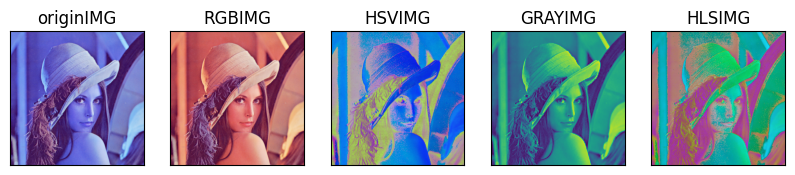

In [2]:
#cvtColor
originIMG = cv2.imread('Lenna.png')
RGBIMG = cv2.cvtColor(originIMG,cv2.COLOR_BGR2RGB)#cv2 read img in BGR, PLT shows in RGB
HSVIMG = cv2.cvtColor(originIMG,cv2.COLOR_BGR2HSV)#HSV( Hue、Saturation、Value )
GRAYIMG = cv2.cvtColor(originIMG,cv2.COLOR_BGR2GRAY)#GRAY
HLSIMG = cv2.cvtColor(originIMG,cv2.COLOR_BGR2HLS)#HLS ( Hue、Saturation、Lightness )
show5plt(originIMG,RGBIMG,HSVIMG,GRAYIMG,HLSIMG,n1="originIMG",n2="RGBIMG",n3="HSVIMG",n4="GRAYIMG",n5="HLSIMG")


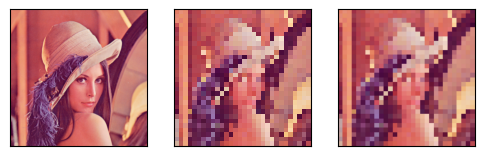

In [3]:
# Nearest_Neighbor_scaling_NN(from https://stackoverflow.com/questions/59805810/logic-behind-nearest-neighbor-interpolation)
def Nearest_Neighbor_scaling(img,newsize):
    old_size = img.shape
    scale_ratio=np.array(newsize)/np.array(old_size)
    row_idx = (np.ceil(range(1, 1 + int(old_size[0]*scale_ratio[0]))/scale_ratio[0]) - 1).astype(int)
    col_idx = (np.ceil(range(1, 1 + int(old_size[1]*scale_ratio[1]))/scale_ratio[1]) - 1).astype(int)
    final_matrix = img[:, row_idx][col_idx, :]
    #show1plt(img[:, col_idx])
    return final_matrix

NNdownsampleIMG=Nearest_Neighbor_scaling(RGBIMG,(30,30,3))
NNupsampleIMG=Nearest_Neighbor_scaling(NNdownsampleIMG,(400,400,3))
show3plt(RGBIMG,NNdownsampleIMG,NNupsampleIMG)

(512, 512)


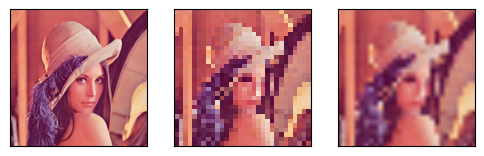

In [32]:
def Bilinear_scaling(img,newsize):
    def Bilinear_2D(img,newsize):
        #`image` is a 2-D numpy array
        #`height` and `width` are the desired spatial dimension of the new 2-D array.
        img_height, img_width = img.shape[0],img.shape[1]
        height,width=newsize[0],newsize[1]
        img = img.ravel()

        x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
        y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

        y, x = np.divmod(np.arange(height * width), width)

        x_l = np.floor(x_ratio * x).astype('int32')
        y_l = np.floor(y_ratio * y).astype('int32')

        x_h = np.ceil(x_ratio * x).astype('int32')
        y_h = np.ceil(y_ratio * y).astype('int32')

        x_weight = (x_ratio * x) - x_l
        y_weight = (y_ratio * y) - y_l

        a = img[y_l * img_width + x_l]
        b = img[y_l * img_width + x_h]
        c = img[y_h * img_width + x_l]
        d = img[y_h * img_width + x_h]
        
        resized = a * (1 - x_weight) * (1 - y_weight) + \
                b * x_weight * (1 - y_weight) + \
                c * y_weight * (1 - x_weight) + \
                d * x_weight * y_weight

        return resized.reshape(height, width)
    rgbArray = np.zeros((newsize[0],newsize[1],3), 'uint8');
    rgbArray[..., 0] = Bilinear_2D(img[:,:,0],newsize)
    rgbArray[..., 1] = Bilinear_2D(img[:,:,1],newsize)
    rgbArray[..., 2] = Bilinear_2D(img[:,:,2],newsize)
    return rgbArray
    
print(RGBIMG[:,:,0].shape)

BilineardownsampleIMG=Bilinear_scaling(RGBIMG,(30,30))
BilinearupsampleIMG=Bilinear_scaling(BilineardownsampleIMG[:,:],(300,300))
show3plt(RGBIMG,BilineardownsampleIMG,BilinearupsampleIMG)

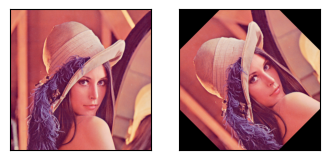

In [5]:

def rotate_CV(image, angel , interpolation):
    h,w = image.shape[:2]
    cX,cY = (w//2,h//2) # floor division of"
    M = cv2.getRotationMatrix2D((cX,cY),angel,1)
    rotated = cv2.warpAffine(image,M , (w,h),flags=interpolation)
    return rotated

rotate_img=rotate_CV(RGBIMG,45,0)            
show2plt(RGBIMG,rotate_img)